In [1]:
#%pip install --force-reinstall pytesseract

In [2]:
from mss import mss
import pydirectinput
import cv2
import numpy as np
import pytesseract
from matplotlib import pyplot as plt
import time
from gym import Env
from gym.spaces import Box, Discrete

In [65]:
class WebGame(Env):
    def __init__(self):
        super().__init__()
        self.observation_space = Box(low=0, high=255, shape=(1,83,200), dtype=np.int8)
        self.action_space = Discrete(3)
        
        self.cap = mss()
        self.game_location = {'top': 300, 'left': 0, 'width': 1200, 'height': 500}
        self.done_location = {'top': 385, 'left': 630, 'width': 660, 'height': 70}
        
        pass
    
    def step(self, action):
        action_map = {
            0:'space',
            1:'down',
            2:'no_op'
        }
        if action != 2:
            pydirectinput.press(action_map[action])
            
        done, done_cap = self.get_done()
        new_observation = self.get_observation()
        reward = 1 
        info = {}
        
        return new_observation, reward, done, info
    
    def reset(self):
        pass
    
    def close(self):
        cv2.destroyAllWindows()
    
    def render(self):
        cv2.imshow('Game', np.array(self.cap.grab(self.game_location))[:,:,:3])
        if cv2.waitKey(1) % 0xFF == ord('q'):
            self.close()
    
    def get_observation(self):
        raw = np.array(self.cap.grab(self.game_location))[:,:,:3]
        gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (200, 83))
        channel = np.reshape(resized, (1,83, 200))
        
        return channel
    
    def get_done(self):
        done_cap = np.array(self.cap.grab(self.done_location))[:,:,:3]
        done = False
        done_strings = ['GAME', 'GAHE', 'GAKN', 'GA E', 'GARn', 'GARH']
        res = pytesseract.image_to_string(done_cap)[:4]
        if res in done_strings:
            done = True
        
        return done, done_cap

In [66]:
env = WebGame()

In [67]:
env.action_space.sample()

2

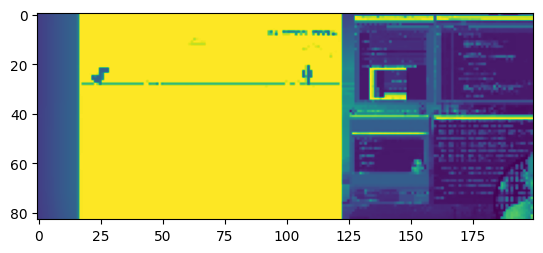

In [68]:
plt.imshow(env.get_observation()[0])

In [69]:
done, done_cap = env.get_done()
done

False

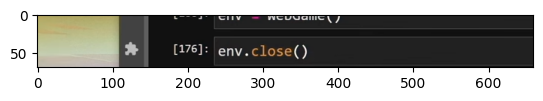

In [70]:
plt.imshow(done_cap)

In [72]:
env.render()

In [73]:
env.close()